 # RetailX: Walmart Customer Behavior Analysis

Retail businesses rely on customer data to optimize operations, improve customer experience, and increase sales. In this project, we analyze a dataset of transactions from Walmart, to provide valuable insights into customer shopping behavior. 

Our project is designed to achieve the following key objectives:

1. Behavioral & Trend Analysis: Identifying purchase patterns, peak shopping times, and high-demand products to improve inventory management and staffing efficiency.
2. Customer Segmentation: Grouping customers based on shopping behaviors for targeted marketing and strategic decision-making.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
os.chdir("/Users/kamito/Library/CloudStorage/OneDrive-DickinsonCollege/02. Learning Materials/05. Spring'25 Learning Materials/03. DATA300-02")

In [16]:

# df = pd.read_csv("C:/Users/Thanh Vu/OneDrive - Dickinson College/VPT/VPT/Spring 2025/Data 300/Project/Walmart_customer_purchases.csv")
df = pd.read_csv("Walmart_customer_purchases.csv")


In [17]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                            Customer_ID  Age  Gender           City  \
0  84607c1f-910c-44d5-b89f-e1ee06dd34c0   49  Female    New Cynthia   
1  f2a81712-a73e-4424-8b39-4c615a0bd4ea   36   Other       Cruzport   
2  da9be287-8b0e-4688-bccd-1a2cdd7567c6   52    Male    Jeffreytown   
3  50ec6932-3ac7-492f-9e55-4b148212f302   47  Female  Jenniferburgh   
4  8fdc3098-fc75-4b0f-983c-d8d8168c6362   43   Other      Kingshire   

      Category Product_Name Purchase_Date  Purchase_Amount    Payment_Method  \
0  Electronics   Smartphone    2024-08-30           253.26  Cash on Delivery   
1     Clothing      T-Shirt    2024-12-21            73.19        Debit Card   
2       Beauty      Perfume    2024-12-26           125.62       Credit Card   
3  Electronics   Smartwatch    2024-11-04           450.32       Credit Card   
4  Electronics   Smartphone    2024-10-07           369.28       Credit Card   

  Discount_Applied  Rating Repeat_Customer  
0               No

# 1: Behavior & Trend Analysis

Understanding customer behavior is crucial for improving business operations. We analyze various aspects of consumer shopping trends, including preferred payment method, peak shopping seasons, popular shopping hours, and best-selling products. These insights allow Walmart managers to allocate staff efficiently during peak hours, optimize inventory to prevent stockouts, and develop strategic pricing for high-demand products.

## 1.1:Payment Method Distribution
We want to know how Walmart customers prefer to pay: Cash, Debit, Credit, etc.

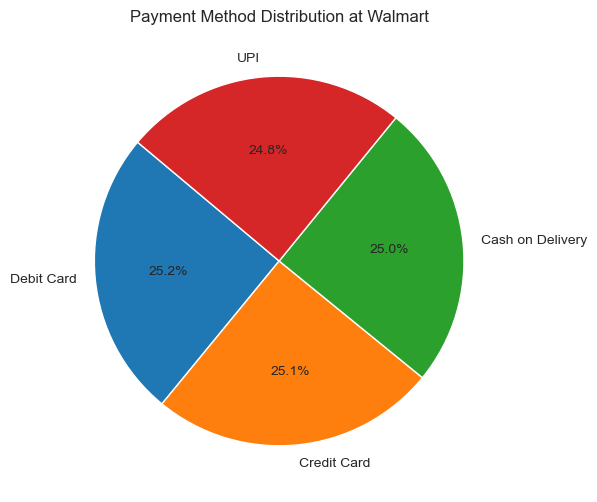

In [18]:
payment_counts = df['Payment_Method'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution at Walmart')
plt.show()


The majority of Walmart customers prefer using Credit Cards and Debit Cards for their purchases. This trend suggests a strong reliance on electronic payment systems. As a result, Walmart should prioritize maintaining and upgrading its card payment infrastructure—including POS systems, connectivity, and fraud prevention protocols—to ensure fast, secure, and reliable transactions, especially during peak hours. Enhancing card payment facilities can lead to improved customer satisfaction and reduced checkout delays.

## 1.2: Top 10 Most Purchased Products
Let's see what customers buy the most by counting the top-selling products.

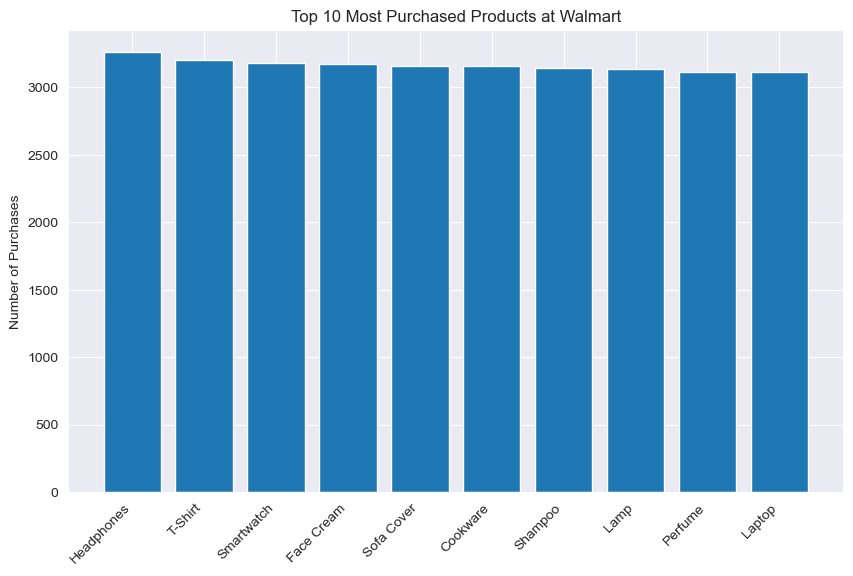

In [19]:
product_counts = df['Product_Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(product_counts.index, product_counts.values)
plt.title('Top 10 Most Purchased Products at Walmart')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.show()

Smartphones and Smartwatches are among the top-selling products. To capitalize on this demand, Walmart should ensure sufficient inventory levels for these items, frequently update stocks with the latest models, and consider promoting related accessories to maximize sales opportunities.

## 1.3:Most Common Age Groups
We group customers into age ranges to see which group shops the most.

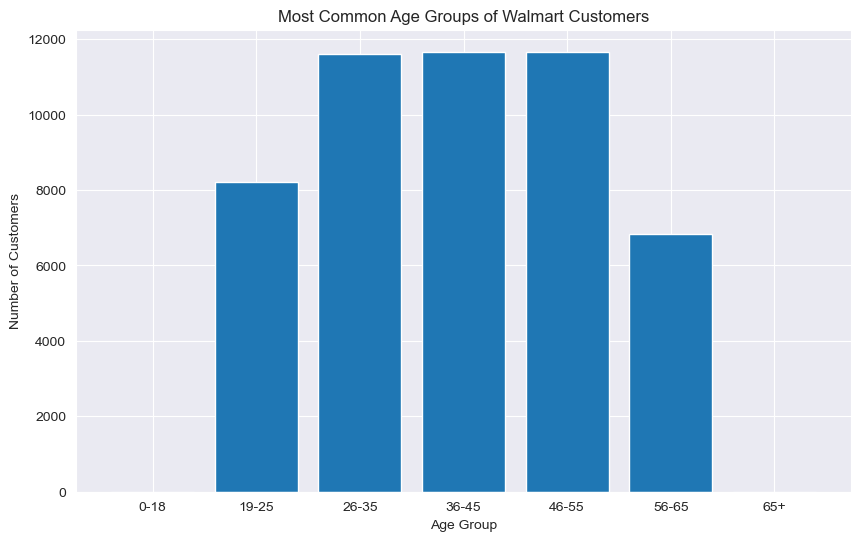

In [20]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['Age_Group'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.title('Most Common Age Groups of Walmart Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.show()

Customers aged 26-35 and 36-45 visit Walmart the most. This highlights the importance of tailoring marketing campaigns, promotions, and product selections to appeal to these age groups. Walmart should prioritize stocking trending and relevant products that resonate with young professionals and middle-aged customers to boost engagement and sales.

## 1.4: Peak shopping hours

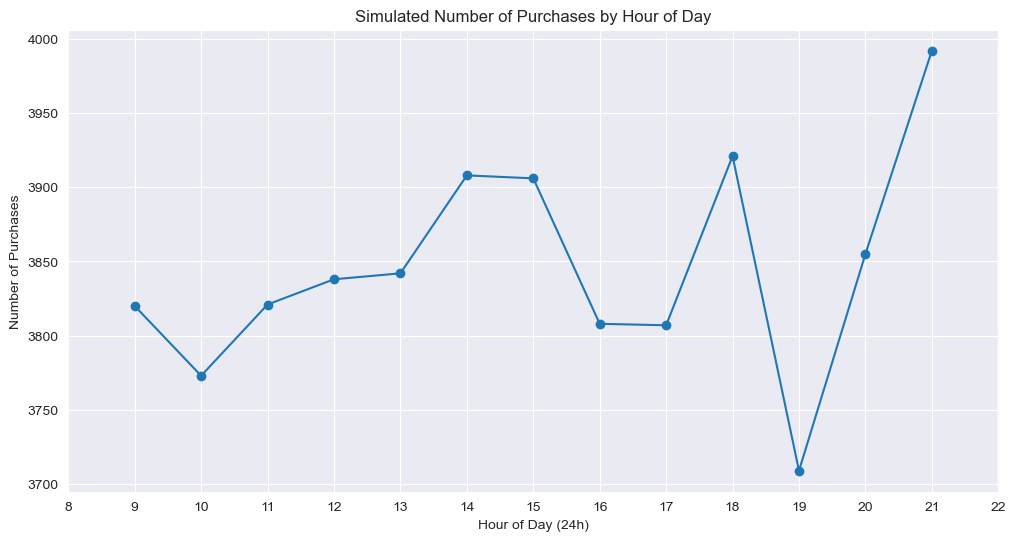

In [21]:
import numpy as np

# If Purchase_Hour is missing, simulate it between 9 AM and 9 PM
np.random.seed(42)
df['Purchase_Hour'] = np.random.choice(range(9, 22), size=len(df))

# Now plot properly
hourly_counts = df['Purchase_Hour'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.xticks(range(8, 23))  # Extend a bit to show better
plt.title('Simulated Number of Purchases by Hour of Day')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.show()


Customers are most active during the afternoon and evening hours, particularly after typical working hours. Walmart should optimize staffing, inventory restocking, and targeted promotions during these peak periods to enhance customer service and boost sales performance.

# 2.Customer Segmentation (Behavior-Based Clustering)

To better understand Walmart’s diverse customer base, we perform clustering analysis to segment shoppers into different categories based on common characteristics. By recognizing these customer segments, Walmart managers can design personalized promotions, targeted advertisements, and loyalty programs to enhance customer retention and sales growth.


In [22]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


df['High_Spender'] = (df['Purchase_Amount'] > df['Purchase_Amount'].median()).astype(int)
df['Young_Adult'] = ((df['Age'] >= 18) & (df['Age'] <= 35)).astype(int)
df['Senior'] = (df['Age'] >= 55).astype(int)
df['Discount_Seeker'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})
df['Loyal_Customer'] = df['Repeat_Customer'].map({'Yes': 1, 'No': 0})
features = df[['High_Spender', 'Young_Adult', 'Senior', 'Discount_Seeker', 'Loyal_Customer']]
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)
cluster_summary = df.groupby('Cluster').agg({
    'High_Spender': 'mean',
    'Young_Adult': 'mean',
    'Senior': 'mean',
    'Discount_Seeker': 'mean',
    'Loyal_Customer': 'mean',
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Customer_Count'})
print("\nCluster Behavioral Summary (% within cluster):")
print((cluster_summary * 100).round(1))




Cluster Behavioral Summary (% within cluster):
         High_Spender  Young_Adult  Senior  Discount_Seeker  Loyal_Customer  \
Cluster                                                                       
0                85.1         59.3     9.5             34.8            14.8   
1                 0.0          0.0    24.5             50.0             0.0   
2                20.3         79.4     0.0             80.5            80.3   
3                61.7          0.0    28.6             38.0           100.0   

         Customer_Count  
Cluster                  
0               1753900  
1                717900  
2               1335100  
3               1193100  


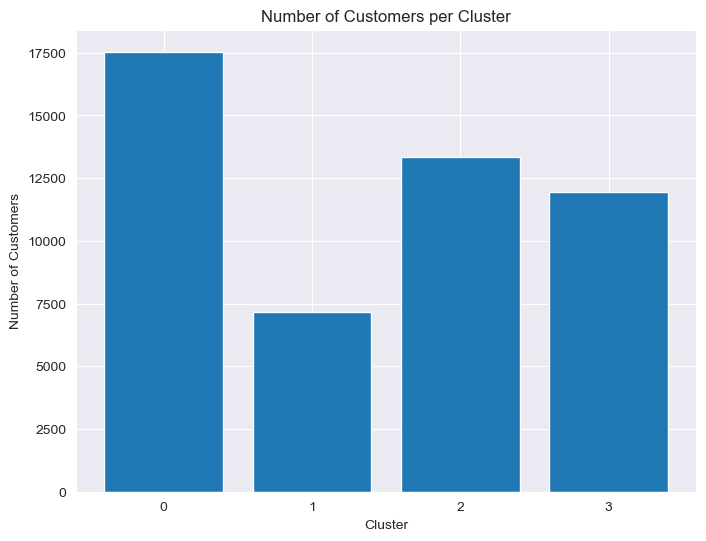

In [23]:
plt.figure(figsize=(8,6))
plt.bar(cluster_summary.index.astype(str), cluster_summary['Customer_Count'])
plt.title('Number of Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [2]:
# Visualize Cluster Characteristics Heatmap
import seaborn as sns
cluster_summary_percent = (cluster_summary[['High_Spender', 'Young_Adult', 'Senior', 'Discount_Seeker', 'Loyal_Customer']] * 100).round(1)

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary_percent, annot=True, cmap="Blues", fmt=".1f")
plt.title('Customer Traits Across Clusters (%)')
plt.xlabel('Traits')
plt.ylabel('Cluster')
plt.show()

NameError: name 'cluster_summary' is not defined

## Cluster Interpretations
- **Cluster 0**: Predominantly young, discount-seeking, and loyal customers who frequently return for savings. Walmart should maintain attractive discount offers and loyalty perks for this group.

- **Cluster 1**: Primarily older, loyal customers who are less focused on discounts. Walmart could benefit by offering premium products and personalized services to retain their loyalty.

- **Cluster 2**: High-spending customers who are less influenced by discounts. Walmart should prioritize upselling high-margin products and exclusive offers to this segment.

- **Cluster 3**: Younger, impulsive shoppers who are new to Walmart. Walmart should capture their attention with trendy, limited-time offers and targeted marketing to build loyalty.

In [25]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group,Purchase_Hour,High_Spender,Young_Adult,Senior,Discount_Seeker,Loyal_Customer,Cluster
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes,46-55,15,0,0,0,0,1,3
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No,36-45,12,0,0,0,1,0,1
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No,46-55,21,0,0,0,1,0,1
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes,46-55,19,1,0,0,0,1,3
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes,36-45,16,1,0,0,1,1,3


In [26]:
# Convert 'Purchase_Date' to datetime objects
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

# Set 'Purchase_Date' as the DataFrame index
df.set_index('Purchase_Date', inplace=True)

# Display the first few rows to verify the index
print(df.head())

                                        Customer_ID  Age  Gender  \
Purchase_Date                                                      
2024-08-30     84607c1f-910c-44d5-b89f-e1ee06dd34c0   49  Female   
2024-12-21     f2a81712-a73e-4424-8b39-4c615a0bd4ea   36   Other   
2024-12-26     da9be287-8b0e-4688-bccd-1a2cdd7567c6   52    Male   
2024-11-04     50ec6932-3ac7-492f-9e55-4b148212f302   47  Female   
2024-10-07     8fdc3098-fc75-4b0f-983c-d8d8168c6362   43   Other   

                        City     Category Product_Name  Purchase_Amount  \
Purchase_Date                                                             
2024-08-30       New Cynthia  Electronics   Smartphone           253.26   
2024-12-21          Cruzport     Clothing      T-Shirt            73.19   
2024-12-26       Jeffreytown       Beauty      Perfume           125.62   
2024-11-04     Jenniferburgh  Electronics   Smartwatch           450.32   
2024-10-07         Kingshire  Electronics   Smartphone           369.28  

In [27]:
# Resample the data by day and sum the 'Purchase_Amount'
daily_sales = df['Purchase_Amount'].resample('D').sum()

# Display the first few rows of the resampled data
print(daily_sales.head())

# You can resample to other frequencies as well:
weekly_sales = df['Purchase_Amount'].resample('W').sum()
monthly_sales = df['Purchase_Amount'].resample('M').sum()

Purchase_Date
2024-02-10    31740.30
2024-02-11    37996.92
2024-02-12    35297.50
2024-02-13    40122.00
2024-02-14    35806.81
Freq: D, Name: Purchase_Amount, dtype: float64


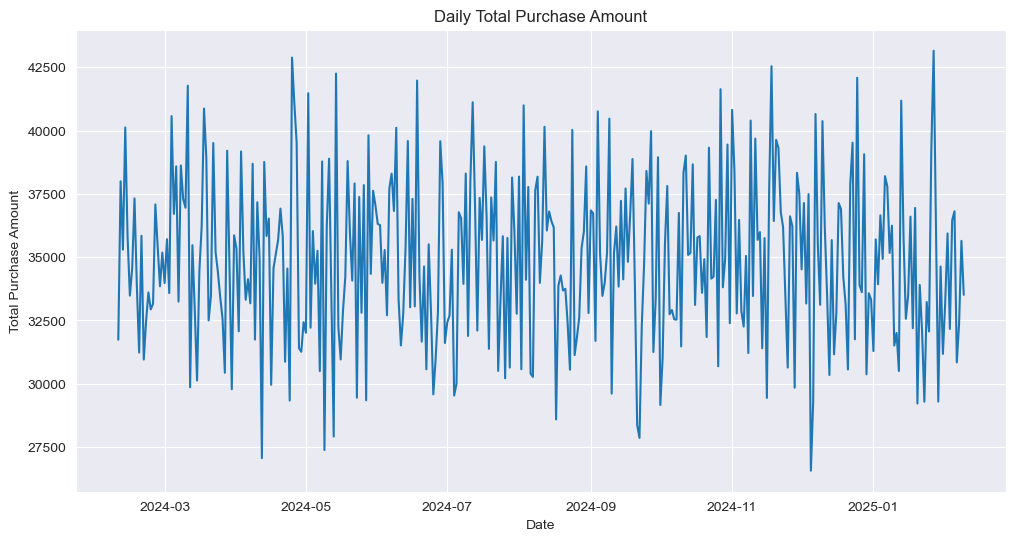

In [28]:
# Plot the daily sales time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Total Purchase Amount')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

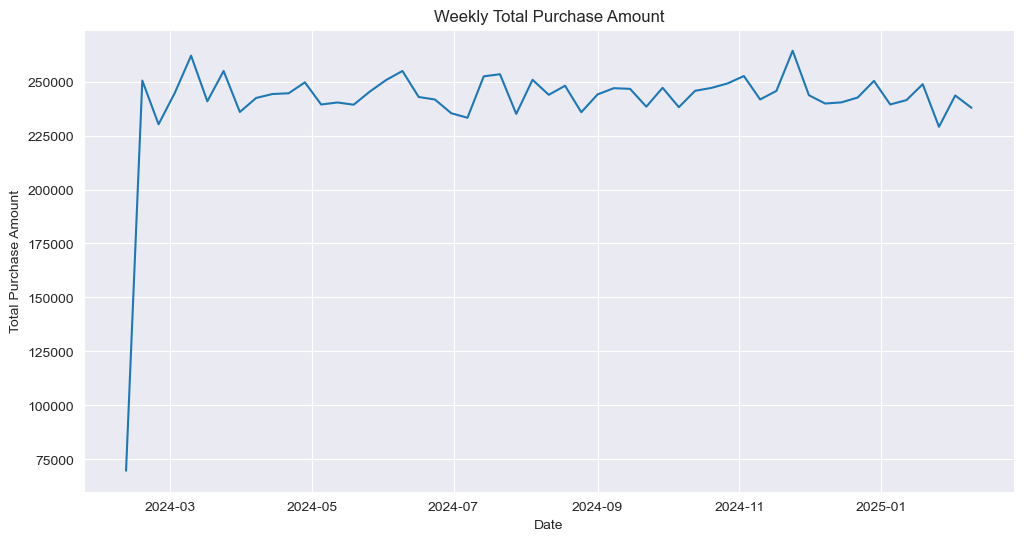

In [29]:
# Plot the weekly sales time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Total Purchase Amount')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

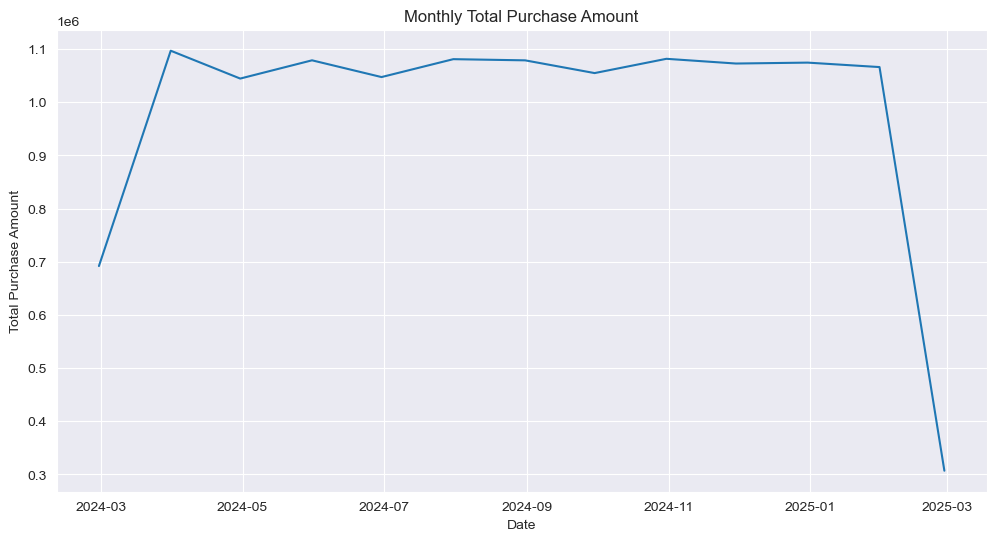

In [30]:
# Plot the monthly sales time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title('Monthly Total Purchase Amount')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.show()

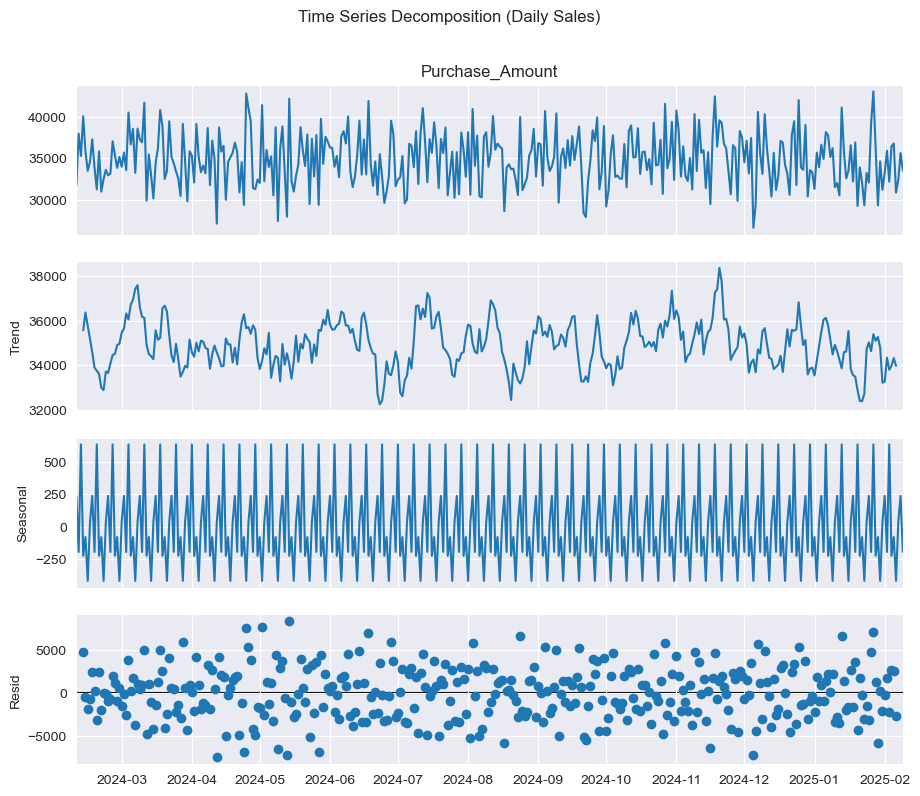

In [31]:
# Import the decomposition function
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomposition = seasonal_decompose(daily_sales, model='additive')

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time Series Decomposition (Daily Sales)', y=1.02)
plt.show()

In [32]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA order (p, d, q)
order = (5, 1, 0)

# Fit the ARIMA model to daily sales data
model = ARIMA(daily_sales, order=order)
arima_result = model.fit()

# Print a summary of the model
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:        Purchase_Amount   No. Observations:                  366
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3528.889
Date:                Wed, 30 Apr 2025   AIC                           7069.778
Time:                        21:30:37   BIC                           7093.177
Sample:                    02-10-2024   HQIC                          7079.077
                         - 02-09-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7821      0.039    -20.044      0.000      -0.859      -0.706
ar.L2         -0.5849      0.049    -12.009      0.000      -0.680      -0.489
ar.L3         -0.4169      0.049     -8.437      0.0


Forecasted Daily Sales for the next 30 days:
2025-02-10    34767.814602
2025-02-11    34100.489015
2025-02-12    33329.363238
2025-02-13    34044.977971
2025-02-14    34107.940007
2025-02-15    33998.525464
2025-02-16    34142.901906
2025-02-17    33933.010960
2025-02-18    33916.376064
2025-02-19    34021.673364
2025-02-20    34001.715494
2025-02-21    34015.770701
2025-02-22    34013.515253
2025-02-23    33979.475976
2025-02-24    33991.398571
2025-02-25    34001.076508
2025-02-26    33999.220303
2025-02-27    34002.914829
2025-02-28    33998.350904
2025-03-01    33994.999498
2025-03-02    33997.823955
2025-03-03    33998.429586
2025-03-04    33998.763628
2025-03-05    33998.959167
2025-03-06    33997.877765
2025-03-07    33997.778419
2025-03-08    33998.183837
2025-03-09    33998.248461
2025-03-10    33998.366847
2025-03-11    33998.283502
Freq: D, Name: predicted_mean, dtype: float64


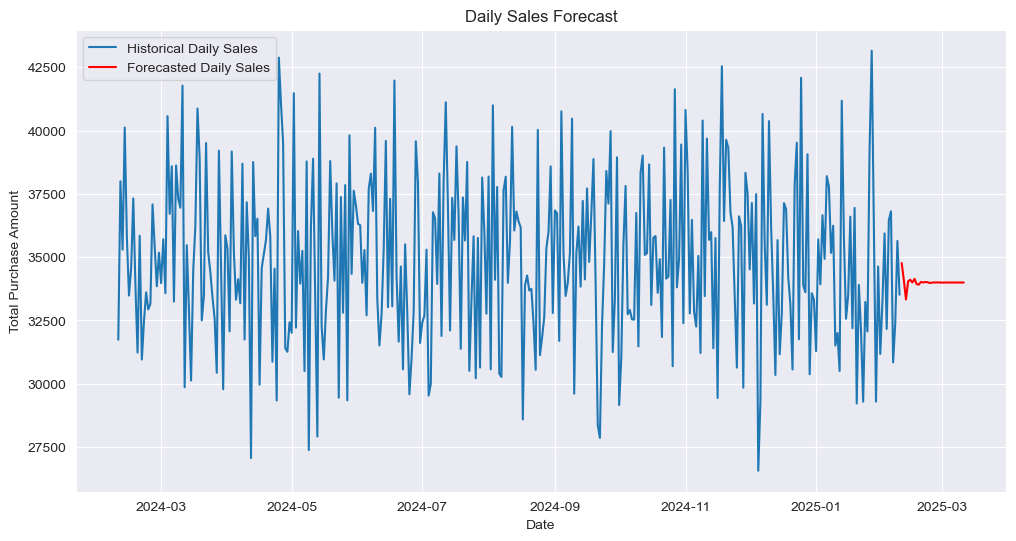

In [33]:
# Forecast future values
steps_ahead = 30 # Forecast for the next 30 days

forecast = arima_result.forecast(steps=steps_ahead)

# Print the forecast
print("\nForecasted Daily Sales for the next {} days:".format(steps_ahead))
print(forecast)

# Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Historical Daily Sales')
plt.plot(forecast.index, forecast.values, label='Forecasted Daily Sales', color='red')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Purchase Amount')
plt.legend()
plt.grid(True)
plt.show()


# Conclusion

## Key Findings
- Credit and Debit Cards are the dominant payment methods, emphasizing the need for Walmart to maintain and continuously upgrade its electronic payment infrastructure for efficiency and customer satisfaction.
- Smartphones and Smartwatches are among the best-selling products, indicating strong demand for electronics. Walmart should prioritize inventory management for these categories and promote related accessories to maximize cross-selling opportunities.
- Customers aged 26-45 form the core shopping demographic, suggesting that marketing efforts and product selections should cater to young professionals and middle-aged families.
- Behavioral clustering revealed distinct customer segments:
  - Discount Seekers: Young, price-sensitive, and loyal customers who respond well to promotional campaigns.
  - High Spenders: Affluent customers less concerned with discounts, ideal targets for premium product upselling.
  - Loyal Seniors: Older customers who value consistency and service, benefiting from personalized loyalty initiatives.
  - New Impulsive Shoppers: Young customers with impulsive buying habits, best engaged through trendy and time-limited offers.
- Peak shopping hours are concentrated in the afternoon and evening, aligning with post-work and trafffic patterns.

## Business Recommendations
- Expand loyalty programs targeting discount seekers to strengthen customer retention.
- Introduce premium product bundles and exclusive offerings to cater to high-spending customers.
- Personalize communication and services for loyal senior customers, focusing on reliability and value.
- Deploy limited-time marketing campaigns to capture the attention of young, impulsive shoppers.
- Optimize staffing and inventory levels to align with peak shopping hours, minimizing checkout times and stockouts.
- Regularly update electronic payment facilities to ensure smooth and rapid transactions, particularly during high-traffic periods.
